In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from io import StringIO
from scipy.stats import linregress
import copy

In [2]:
def ReadData(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        i = 0
        while lines[i][0].isalpha():
            print(lines[i]) 
            i += 1
        data_str = ''.join(lines[i:])
        df = pd.read_csv(
        StringIO(data_str),
        sep='\s+',          # 匹配任意空白字符作为分隔符
        header=None,        # 没有标题行
        names=['Time', 'Amplitude', 'Real', 'Imag']  # 手动指定列名
        ) 

    return df

In [3]:
folder = r'C:\Users\DELL\Downloads\Modern Physics Lab\核磁共振与脉冲成像\2100011868'

In [4]:
filename = folder + r'\0.5%.pea'

In [5]:
lines = ReadData(filename)

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag



In [6]:
time = np.array(lines['Time'])
amplitude = np.array(lines['Amplitude'])

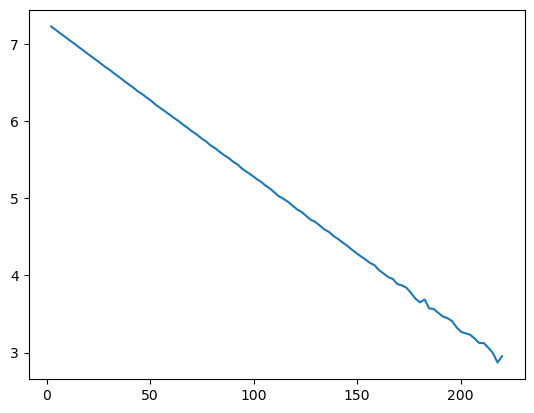

In [7]:
plt.plot(time ,np.log(amplitude))

In [8]:
def plot_data(filename,type, Y, log=True):
    data = ReadData(folder+'\\'+filename+type )
    time = np.array(data['Time'])
    amplitude = np.array(data[Y])
    if log:
        plt.plot(time, np.log(amplitude), label=filename)
        return [time, np.log(amplitude)]
    plt.plot(time, amplitude, label=filename)
    return [time, (amplitude)]

In [9]:
def batch_plot(figname,filelist,type, Y, log=False):
    data = []
    for filename in filelist:
        data.append(plot_data(filename,type, Y, log))
    plt.legend()
    plt.xlabel('Time (ms)')
    if log:
        plt.ylabel('log(Amplitude)')
    else:
        plt.ylabel('Amplitude')
    
    ax = plt.gca()
    fig = plt.gcf()
    
    plt.savefig(figname + '.png', dpi=300, bbox_inches='tight')
    plt.show()
    return data,fig,ax


In [10]:
filelist= ['0.5%','1%','2%']

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag



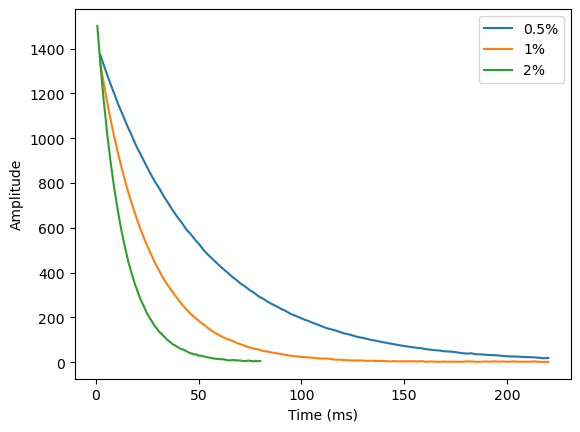

In [11]:
data_nolog,f0,ax_nolog = batch_plot('CPMG',filelist, '.pea', 'Amplitude', log=False)

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag

Title = Echo Peak File

Version = 1.0

Num of Echo Peaks =100

Time(ms)   --   Amplitude--       Real  --     Imag



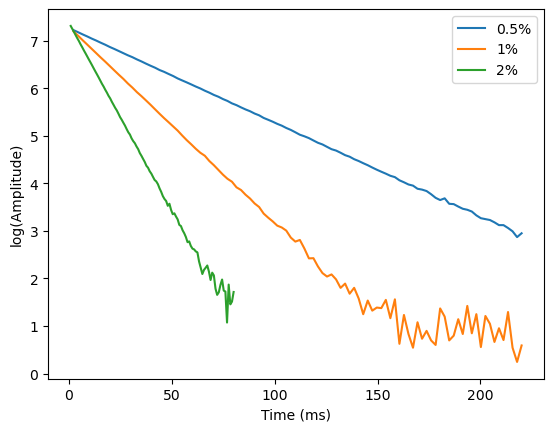

In [12]:
data,f,axlog = batch_plot('CPMG',filelist, '.pea', 'Amplitude', log=True)

Title = NIUMAG IRT1 PEAK FILE

Version = 1.0

IRT1 COUNT=50

Time(ms)   --   Amplitude--       Real  --     Imag

Title = NIUMAG IRT1 PEAK FILE

Version = 1.0

IRT1 COUNT=50

Time(ms)   --   Amplitude--       Real  --     Imag

Title = NIUMAG IRT1 PEAK FILE

Version = 1.0

IRT1 COUNT=50

Time(ms)   --   Amplitude--       Real  --     Imag



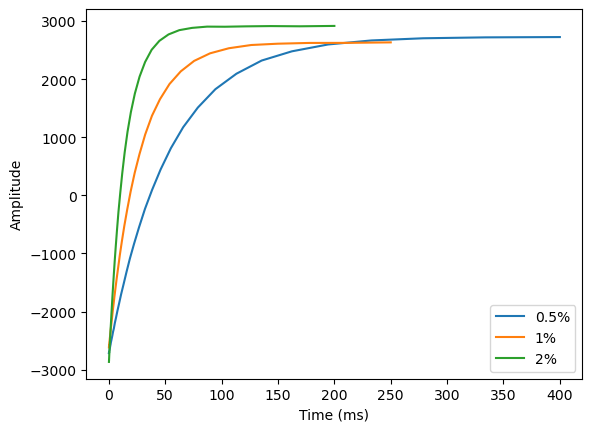

In [13]:
data2,f2,ax1=batch_plot('t',filelist, '.irp', 'Amplitude', log=False)

In [14]:
def linear_fit(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    print(f"Slope: {slope},T2:{-1/slope}, Intercept: {intercept}, R: {r_value}, P-value: {p_value}, Std Err: {std_err}")
    def lfunction(t):
        return slope * t + intercept
    return lfunction

In [15]:
line0= linear_fit(data[0][0][:20], data[0][1][:20])
line1= linear_fit(data[1][0][:20], data[1][1][:20])
line2= linear_fit(data[2][0][:20], data[2][1][:20])

Slope: -0.019995391600404366,T2:50.01152365426927, Intercept: 7.26911405815753, R: -0.9999854651121519, P-value: 2.7493335670778966e-42, Std Err: 2.541085255223324e-05
Slope: -0.04129960588118169,T2:24.213306123961182, Intercept: 7.287192236563691, R: -0.9999907257283457, P-value: 4.820019644162219e-44, Std Err: 4.192446987196865e-05
Slope: -0.0798199492142649,T2:12.528196395059677, Intercept: 7.376999333775797, R: -0.999990014555761, P-value: 9.372078099253297e-44, Std Err: 8.407698709044677e-05


In [16]:
axlog.plot(data[0][0], line0(data[0][0]), color='red',ls='dashed', label='Linear Fit')
axlog.plot(data[1][0][:-20], line1(data[1][0][:-20]), color='red',ls='dashed')
axlog.plot(data[2][0], line2(data[2][0]), color='red',ls='dashed')
axlog.legend()

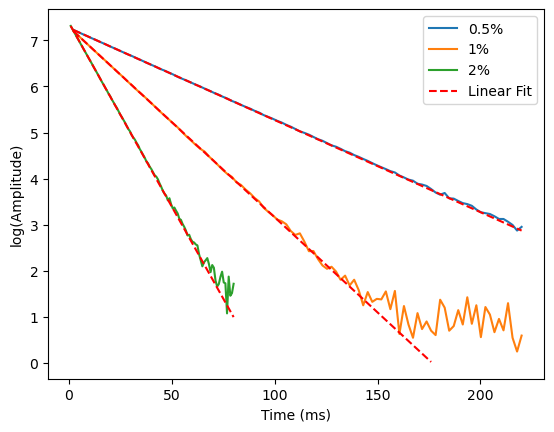

In [17]:
f

In [18]:
t1=data2[0][0]
A1=data2[0][1]

In [30]:
def IR_seq(t,x):
    X=-x+max(x)+1
    line=linear_fit(t[:20],np.log(X)[:20])
    fit = line(t)
    return np.log(X),fit

Slope: -0.019691015193346574,T2:50.78458323153859, Intercept: 8.602706194448793, R: -0.9984382622985023, P-value: 5.218856227368099e-24, Std Err: 0.0002596928869445746
Slope: -0.03773030389876385,T2:26.503894659400366, Intercept: 8.567360104261892, R: -0.9991973675083023, P-value: 1.3090026581538587e-26, Std Err: 0.00035652416666925613
Slope: -0.06991166846496674,T2:14.303763906036766, Intercept: 8.666558412439231, R: -0.9997666142700381, P-value: 1.949165744400189e-31, Std Err: 0.0003560750878983123


Text(0, 0.5, 'log(Amplitude)')

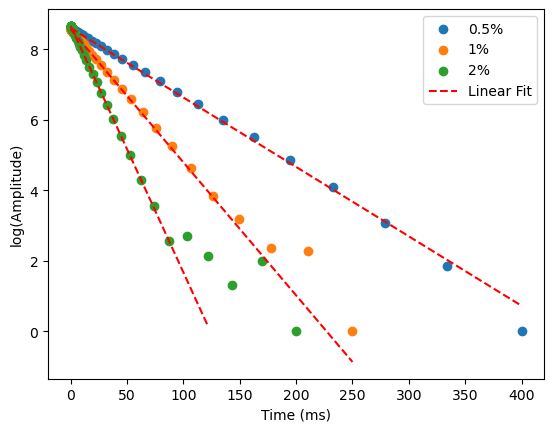

In [31]:
X0,fit0=IR_seq(t1,A1)
X1,fit1=IR_seq(data2[1][0],data2[1][1])
X2,fit2=IR_seq(data2[2][0],data2[2][1])
plt.scatter(t1, X0, label='0.5%')
plt.scatter(data2[1][0], X1, label='1%')
plt.scatter(data2[2][0], X2, label='2%')
plt.plot(t1, fit0, color='red',ls='dashed', label='Linear Fit')
plt.plot(data2[1][0], fit1, color='red',ls='dashed')
plt.plot(data2[2][0][:-3], fit2[:-3], color='red',ls='dashed')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('log(Amplitude)')